In [94]:
import pandas as pd
from utils import *
import numpy as np
from concurrent.futures import ProcessPoolExecutor
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
in_dir = 'out/113_114_115/'
NUM_SENTENCE = 6

In [3]:
def extra_clean(s):
    END_TOKENS = ['.', '!', '?', '...', "'", "`", '"',")"]
    s_new = s.strip().replace('``', '"').replace("''", '"').replace('-LRB-', '(').replace('-RRB-', ')')
    if s_new[-1] in END_TOKENS: return s_new
    return s_new + "."

In [4]:
def get_bill(data):
    i, row = data
    bill_dict = {}
    bill = row.ID
    bill_dict['ID'] = bill
    
    # get, clean, and save bill
    bill_path = in_dir + 'BILL_' + bill + '.out'
    with open(bill_path) as f:
        bill_text = f.readlines()
    num_bill_sentences = len(bill_text)
    clean_bill = '\n'.join([extra_clean(i) for i in bill_text])
    bill_dict['bill_text'] = clean_bill
    bill_dict['bill_text_clean'] = ' '.join(clean_bill.split('\n'))
    bill_dict['bill_length'] = num_bill_sentences
    
    # get, clean, and save CRS summary
    summ_path = in_dir + 'SUMMARY_' + bill + '.out'
    with open(summ_path) as f:
        summ_text = f.readlines()
    num_summ_sentences = len(summ_text)
    clean_summ = '\n'.join([extra_clean(i) for i in summ_text])
    bill_dict['CRS_summary'] = clean_summ
    bill_dict['CRS_summary_clean'] = ' '.join(clean_summ.split('\n'))
    bill_dict['summ_length'] = num_summ_sentences
    
    return bill_dict

In [5]:
def get_KL(data):
    i, row = data
    clean_bill = row.bill_text
    bill_dict = {}
    bill = row.ID
    bill_dict['ID'] = bill
    num_bill_sentences = row.bill_length
    clean_summ = row.CRS_summary
    
    if num_bill_sentences < 300:
        
        # create and save automatic summaries
        summary_KL = run_sumy(text = clean_bill, algo='KL', sent_count=NUM_SENTENCE)
        summary_KL_clean = ' '.join([str(sentence) for sentence in summary_KL])
        bill_dict['KL_summary'] = summary_KL_clean

        # evaluate automatic summaries
        CRS_sumy = convert_summary(clean_summ)
        rouge_KL = eval_sumy(summary_KL, CRS_sumy)
        bill_dict['KL_rouge_dict'] = rouge_KL
        bill_dict['KL_rouge1'] = rouge_KL['rouge1_recall']
    
    return bill_dict

In [44]:
def get_LR(data):
    i, row = data
    clean_bill = row.bill_text
    bill_dict = {}
    bill = row.ID
    bill_dict['ID'] = bill
    num_bill_sentences = row.bill_length
    clean_summ = row.CRS_summary
    
    if num_bill_sentences < 300:
        
        # create and save automatic summaries
        summary_LR = run_sumy(text = clean_bill, algo='LexRank', sent_count=NUM_SENTENCE)
        summary_LR_clean = ' '.join([str(sentence) for sentence in summary_LR])
        bill_dict['LR_summary'] = summary_LR_clean

        # evaluate automatic summaries
        CRS_sumy = convert_summary(clean_summ)
        rouge_LR = eval_sumy(summary_LR, CRS_sumy)
        bill_dict['LR_rouge_dict'] = rouge_LR
        bill_dict['LR_rouge1'] = rouge_LR['rouge1_recall']
        
    return bill_dict

In [7]:
dev = pd.read_csv('./out/validate_113_114_115.csv')
test = pd.read_csv('./out/test_113_114_115.csv')

#### Dev Data

###### Get Bill Data

In [8]:
# counts = range(1, len(dev)+1)
# dev_dicts = []
# with ProcessPoolExecutor() as executor:
#     for i, bill_dict in zip(counts, executor.map(get_bill, dev.iterrows())):
#         dev_dicts.append(bill_dict)
#         if i % 100 == 0:
#             print('{}/{} bills'.format(i, len(dev)))

In [9]:
# dev_bills = pd.DataFrame(dev_dicts)

###### KL Summaries

In [10]:
# counts = range(1, len(dev_bills)+1)
# dev_kl_dicts = []
# with ProcessPoolExecutor() as executor:
#     for i, bill_dict in zip(counts, executor.map(get_KL, dev_bills.iterrows())):
#         dev_kl_dicts.append(bill_dict)
#         if i % 100 == 0:
#             print('{}/{} bills'.format(i, len(dev_bills)))

In [11]:
# dev_KL = pd.DataFrame(dev_kl_dicts)
# dev_bills = dev_bills.merge(dev_KL, on='ID')

###### LR Summaries

In [12]:
# counts = range(1, len(dev_bills)+1)
# dev_lr_dicts = []
# with ProcessPoolExecutor() as executor:
#     for i, bill_dict in zip(counts, executor.map(get_LR, dev_bills.iterrows())):
#         dev_lr_dicts.append(bill_dict)
#         if i % 100 == 0:
#             print('{}/{} bills'.format(i, len(dev_bills)))

In [13]:
# dev_LR = pd.DataFrame(dev_lr_dicts)
# dev_bills = dev_bills.merge(dev_LR, on='ID')

In [14]:
# dev_bills.to_csv('dev_kl_lr.csv')

In [15]:
dev_bills = pd.read_csv('dev_kl_lr.csv')

#### Test Data

###### Get Bill Data

In [16]:
# counts = range(1, len(test)+1)
# test_dicts = []
# with ProcessPoolExecutor() as executor:
#     for i, bill_dict in zip(counts, executor.map(get_bill, test.iterrows())):
#         test_dicts.append(bill_dict)
#         if i % 100 == 0:
#             print('{}/{} bills'.format(i, len(test)))

100/2307 bills
200/2307 bills
300/2307 bills
400/2307 bills
500/2307 bills
600/2307 bills
700/2307 bills
800/2307 bills
900/2307 bills
1000/2307 bills
1100/2307 bills
1200/2307 bills
1300/2307 bills
1400/2307 bills
1500/2307 bills
1600/2307 bills
1700/2307 bills
1800/2307 bills
1900/2307 bills
2000/2307 bills
2100/2307 bills
2200/2307 bills
2300/2307 bills


In [17]:
# test_bills = pd.DataFrame(test_dicts)

###### KL Summaries

In [23]:
# counts = range(1, len(test_bills)+1)
# test_kl_dicts = []
# with ProcessPoolExecutor() as executor:
#     for i, bill_dict in zip(counts, executor.map(get_KL, test_bills.iterrows())):
#         test_kl_dicts.append(bill_dict)
#         if i % 100 == 0:
#             print('{}/{} bills'.format(i, len(test_bills)))

100/2307 bills
200/2307 bills
300/2307 bills
400/2307 bills
500/2307 bills
600/2307 bills
700/2307 bills
800/2307 bills
900/2307 bills
1000/2307 bills
1100/2307 bills
1200/2307 bills
1300/2307 bills
1400/2307 bills
1500/2307 bills
1600/2307 bills
1700/2307 bills
1800/2307 bills
1900/2307 bills
2000/2307 bills
2100/2307 bills
2200/2307 bills
2300/2307 bills


In [24]:
# test_KL = pd.DataFrame(test_kl_dicts)
# test_bills = test_bills.merge(test_KL, on='ID')

###### LR Summaries

In [46]:
# test_lr_dicts = []
# for i in range(len(test_bills)):
#     bill_dict = get_LR((i, test_bills.iloc[i]))
#     test_lr_dicts.append(bill_dict)
#     if i % 100 == 0:
#         print('{}/{} bills'.format(i, len(test_bills)))

0/2307 bills
100/2307 bills
200/2307 bills
300/2307 bills
400/2307 bills
500/2307 bills
600/2307 bills
700/2307 bills
800/2307 bills
900/2307 bills
1000/2307 bills
1100/2307 bills
1200/2307 bills
1300/2307 bills
1400/2307 bills
1500/2307 bills
1600/2307 bills
1700/2307 bills
1800/2307 bills
1900/2307 bills
2000/2307 bills
2100/2307 bills
2200/2307 bills
2300/2307 bills


In [47]:
# test_LR = pd.DataFrame(test_lr_dicts)
# test_bills = test_bills.merge(test_LR, on='ID')

In [49]:
# test_bills.to_csv('test_kl_lr.csv')

In [ ]:
test_bills = pd.read_csv('test_kl_lr.csv')

#### Stats

In [48]:
print('Number of sentences')
print('\nValidation set \n\tMean: {} \n\tStandard deviation: {}'.format(dev_bills.bill_length.mean(), dev_bills.bill_length.std()))
print('\nTest set \n\tMean: {} \n\tStandard deviation: {}'.format(test_bills.bill_length.mean(), test_bills.bill_length.std()))

Number of sentences

Validation set 
	Mean: 108.37727666955767 
	Standard deviation: 471.88677259190126

Test set 
	Mean: 108.03901170351105 
	Standard deviation: 579.7745802971876


In [72]:
def get_rouge(row, algo, rouge_value):
    if algo == 'KL':
        rouge_dict = row.KL_rouge_dict
    elif algo == 'LR':
        rouge_dict = row.LR_rouge_dict
    else:
        raise 'incorrect algo'
    if isinstance(rouge_dict, dict):
        return rouge_dict[rouge_value]
    else:
        return None

In [73]:
test_bills['KL_rouge2'] = test_bills.apply(lambda x: get_rouge(x, 'KL', 'rouge2_recall'), axis=1)
test_bills['KL_rougeL'] = test_bills.apply(lambda x: get_rouge(x, 'KL', 'rougeL_recall'), axis=1)
test_bills['LR_rouge2'] = test_bills.apply(lambda x: get_rouge(x, 'LR', 'rouge2_recall'), axis=1)
test_bills['LR_rougeL'] = test_bills.apply(lambda x: get_rouge(x, 'LR', 'rougeL_recall'), axis=1)

In [82]:
test_bills['KL_rouge1_P'] = test_bills.apply(lambda x: get_rouge(x, 'KL', 'rouge1_precision'), axis=1)
test_bills['KL_rouge2_P'] = test_bills.apply(lambda x: get_rouge(x, 'KL', 'rouge2_precision'), axis=1)
test_bills['KL_rougeL_P'] = test_bills.apply(lambda x: get_rouge(x, 'KL', 'rougeL_precision'), axis=1)
test_bills['LR_rouge1_P'] = test_bills.apply(lambda x: get_rouge(x, 'LR', 'rouge1_precision'), axis=1)
test_bills['LR_rouge2_P'] = test_bills.apply(lambda x: get_rouge(x, 'LR', 'rouge2_precision'), axis=1)
test_bills['LR_rougeL_P'] = test_bills.apply(lambda x: get_rouge(x, 'LR', 'rougeL_precision'), axis=1)

In [89]:
test_bills['KL_rouge1_F'] = test_bills.apply(lambda x: get_rouge(x, 'KL', 'rouge1_f'), axis=1)
test_bills['KL_rouge2_F'] = test_bills.apply(lambda x: get_rouge(x, 'KL', 'rouge2_f'), axis=1)
test_bills['KL_rougeL_F'] = test_bills.apply(lambda x: get_rouge(x, 'KL', 'rougeL_F'), axis=1)
test_bills['LR_rouge1_F'] = test_bills.apply(lambda x: get_rouge(x, 'LR', 'rouge1_f'), axis=1)
test_bills['LR_rouge2_F'] = test_bills.apply(lambda x: get_rouge(x, 'LR', 'rouge2_f'), axis=1)
test_bills['LR_rougeL_F'] = test_bills.apply(lambda x: get_rouge(x, 'LR', 'rougeL_F'), axis=1)

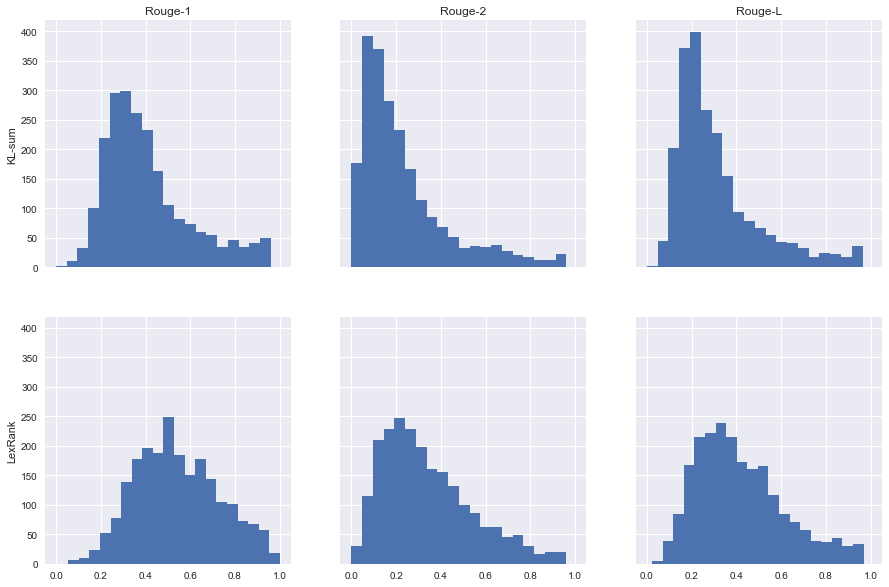

In [80]:
plt.style.use('seaborn')
fig, ax = plt.subplots(2, 3, figsize=(15,10), sharex=True, sharey=True)
test_bills.KL_rouge1.hist(bins=20, ax=ax[0,0])
test_bills.KL_rouge2.hist(bins=20, ax=ax[0,1])
test_bills.KL_rougeL.hist(bins=20, ax=ax[0,2])
test_bills.LR_rouge1.hist(bins=20, ax=ax[1,0])
test_bills.LR_rouge2.hist(bins=20, ax=ax[1,1])
test_bills.LR_rougeL.hist(bins=20, ax=ax[1,2])
ax[0,0].set_ylabel('KL-sum')
ax[1,0].set_ylabel('LexRank')
ax[0,0].set_title('Rouge-1')
ax[0,1].set_title('Rouge-2')
ax[0,2].set_title('Rouge-L')
plt.show()

In [91]:
metrics = ['KL_rouge1', 'KL_rouge2', 'KL_rougeL', 'LR_rouge1', 'LR_rouge2', 'LR_rougeL',
          'KL_rouge1_P', 'KL_rouge2_P', 'KL_rougeL_P', 'LR_rouge1_P', 'LR_rouge2_P', 'LR_rougeL_P',
          'KL_rouge1_F', 'KL_rouge2_F', 'KL_rougeL_F', 'LR_rouge1_F', 'LR_rouge2_F', 'LR_rougeL_F',]
for metric in metrics:
    print('{}: mean {}, std dev {}'.format(metric, test_bills[metric].mean(), test_bills[metric].std()))

KL_rouge1: mean 0.4085841104282545, std dev 0.19336888440152306
KL_rouge2: mean 0.23263455521588702, std dev 0.19925127585179214
KL_rougeL: mean 0.3136355462180281, std dev 0.19061786683168852
LR_rouge1: mean 0.5425553923000387, std dev 0.1878182089693503
LR_rouge2: mean 0.3401927956938935, std dev 0.20231607405959814
LR_rougeL: mean 0.4175673675970298, std dev 0.1966441662414667
KL_rouge1_P: mean 0.38759151384206464, std dev 0.14853923569612146
KL_rouge2_P: mean 0.20997843180311165, std dev 0.13977260582494241
KL_rougeL_P: mean 0.2614266473215968, std dev 0.12789598905640104
LR_rouge1_P: mean 0.39769003646625495, std dev 0.13402333900411947
LR_rouge2_P: mean 0.22427195413555015, std dev 0.11729779926565878
LR_rougeL_P: mean 0.2480889948308329, std dev 0.10876001765519314
KL_rouge1_F: mean 0.3685829637269611, std dev 0.1205262451655499
KL_rouge2_F: mean 0.19740595795792892, std dev 0.1283010355519521
KL_rougeL_F: mean 0.2229327252099482, std dev 0.10181155995029852
LR_rouge1_F: mean 0.

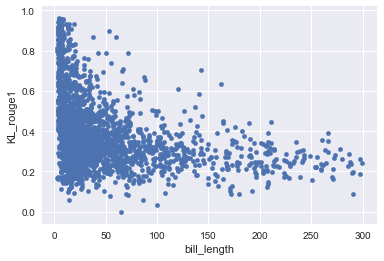

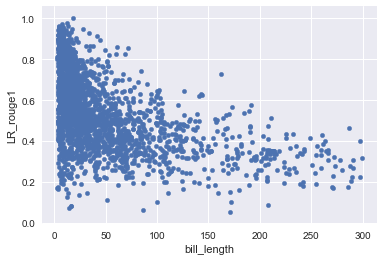

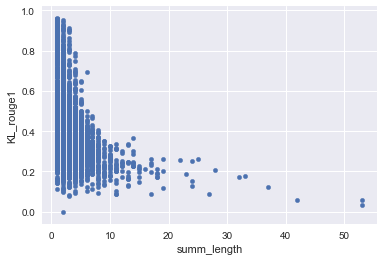

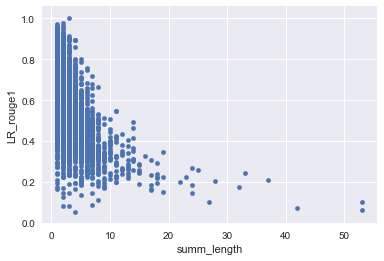

In [98]:
test_bills.plot(x='bill_length', y='KL_rouge1', kind='scatter')
test_bills.plot(x='bill_length', y='LR_rouge1', kind='scatter')
test_bills.plot(x='summ_length', y='KL_rouge1', kind='scatter')
test_bills.plot(x='summ_length', y='LR_rouge1', kind='scatter')